$\delta_r \cdot \frac{\lambda}{2\pi} + \frac{2\cdot d }{\cos\theta} = N\lambda$

$\cos\theta = \frac{2d}{N\lambda - \frac{\delta_r\lambda}{2\pi}}$

In [8]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
import sys
from jax import grad
from jax import numpy as jnp

dir_path = os.path.abspath('')
sys.path.append(dir_path + '/../')

from giopy import Interpolazione, final_val
from interpolazione import Interpolazione as scipy_Interpolazione

sys.path.append(dir_path)

dir_path = os.path.abspath('')
FILE = dir_path + '/data/' + 'coseno_legge2.csv'
fr = pd.read_csv(FILE)
fr

,N,raggio interferenza 1 (cm),raggio interferenza 2 (cm),raggio interferenza 3 (cm),sigma raggio (mm),raggio (cm),sigmaraggio (cm),distanza (cm),spessore lente (mm),valore focale lente
0,0,1.4,1.5,1.1,1.0,1.3333,0.3122,177.5,6.65,18mm
1,1,2.6,2.1,2.6,NaN,2.4333,0.4330,177.6,NaN,NaN
2,2,3.5,3.4,3.4,NaN,3.4333,0.0866,177.5,NaN,NaN
3,3,4.1,4.0,4.1,NaN,4.0667,0.0866,177.4,NaN,NaN
4,4,4.7,4.6,4.6,NaN,4.6333,0.0866,177.3,NaN,NaN
5,5,5.2,5.0,5.1,NaN,5.1000,0.1500,NaN,NaN,NaN
6,6,5.6,5.4,5.6,NaN,5.5333,0.1732,NaN,NaN,NaN
7,7,6.1,5.8,6.0,NaN,5.9667,0.2291,NaN,NaN,NaN
8,8,6.4,6.2,6.4,NaN,6.3333,0.1732,NaN,NaN,NaN


In [9]:
dy = np.array(fr['raggio (cm)']) * 0.01# misura sul muro
sigmady = np.ones_like(dy) * 0.005

dx = 1.77
sigmadx = 0.01

N = np.array(fr['N'])
sigmaN = np.zeros(len(N))
λ = 632.8 * 10**(-9)

def cos_f(dy,dx):
    return jnp.cos(jnp.arctan(dy/dx))

def sigma_cos(dy,dx,sigmadx,sigmady):
    ddy = np.array([grad(cos_f,0)(y,dx) for y in dy])
    ddx = np.array([grad(cos_f,1)(y,dx) for y in dy])
    return np.sqrt(ddy**2 * sigmady**2 + ddx**2 * sigmadx**2)

cos = cos_f(dy,dx) # VALORI USATI PER IL FIT
sigma_cos = sigma_cos(dy,dx,sigmadx,sigmady)

$\delta_r \cdot \frac{\lambda}{2\pi} + \frac{2\cdot d }{\cos\theta} = N\lambda$

$\cos\theta = \frac{2d}{N\lambda - \frac{\delta_r\lambda}{2\pi}}$

----------------- VALORI FIT: -----------------
δr: (-8.125 ± 0.002)e4 
d: (4.091 ± 0.001)e-3 

dof: 7
chi2: 0.1
chi2 ridotto: 0.01
pvalue: 1.0
------------------------------------------------



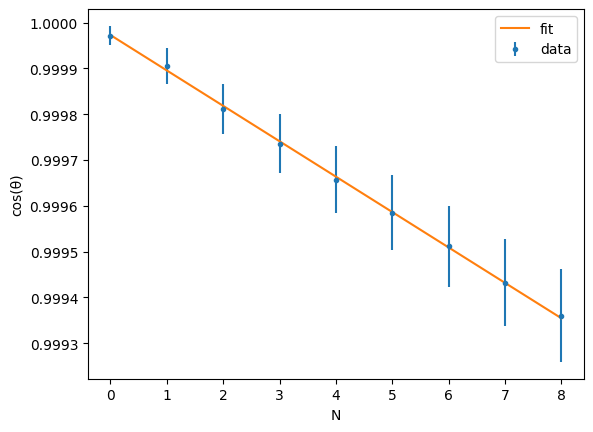

In [10]:
def cosVSN(N,δr,d):
    return 2*d/(N*λ-(δr*λ/(2*jnp.pi)))

fit = Interpolazione(N,cos,sigma_cos,sigmaN,cosVSN,[-8000,0.004],names=['δr','d'])
print(fit)

plt.errorbar(N,cos,yerr=sigma_cos,fmt='.',label='data') # PUNTI SPERIMENTALI
plt.plot(*fit.draw(),label='fit') # FIT

plt.xlabel('N')
plt.ylabel('cos(θ)')

plt.legend()
plt.show()

## ritento a stimare Y soltanto con 3 parametri liberi:

----------------- VALORI FIT: -----------------
δr: (-6.224 ± 2565.867)e-5 
d: (1.019 ± 0.0)e6 
dx: (3.093 ± 0.02)e2 

dof: 6
chi2: 2.16
chi2 ridotto: 0.36
pvalue: 0.9
------------------------------------------------



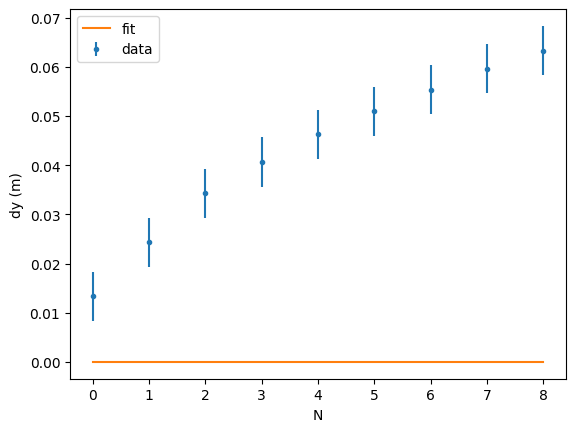

In [18]:
def yVSn(N,dx,δr,d):
    cos = 2*d/(N*λ-(δr*λ/(2*jnp.pi)))
    return (dx**2) * (1/cos**2 -1)

fit = Interpolazione(N,dy**2,sigmady,sigmaN,yVSn,[-8000,0.004,1.77],names=['δr','d','dx'])
print(fit)

plt.errorbar(N,dy,yerr=sigmady,fmt='.',label='data') # PUNTI SPERIMENTALI
plt.plot(*fit.draw(),label='fit') # FIT

# plt.plot(N,yVSn(N,dx,*fit.values.values()),label='fit')

plt.xlabel('N')
plt.ylabel('dy (m)')

plt.legend()
plt.show()

## plot coseni vs N

In [12]:
# def cos_f(dy,dx):
#     return jnp.cos(jnp.arctan(dy/dx))

# def sigma_cos(dy,dx,sigmadx,sigmady):
#     ddy = np.array([grad(cos_f,0)(y,dx) for y in dy])
#     ddx = np.array([grad(cos_f,1)(y,dx) for y in dy])
#     return np.sqrt(ddy**2 * sigmady**2 + ddx**2 * sigmadx**2)

# cos = cos_f(dy,dx)
# sigmacos = sigma_cos(dy,dx,sigmadx,sigmady)

# plt.errorbar(N,cos,yerr=sigmacos,xerr=sigmaN,fmt='.-')